In [9]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import os as os

In [10]:
os.getcwd()

'c:\\Users\\massi\\Programming\\START Hack\\Start_Hack21\\Visualization'

In [11]:
#print basic chart
def printChart(dataset_name, title):
    series = pd.read_csv('../dataset\Intraday/%s.csv' % (dataset_name), header=0, index_col=0, parse_dates=True, squeeze=True)
    series.plot()
    plt.title(title)
    plt.show()

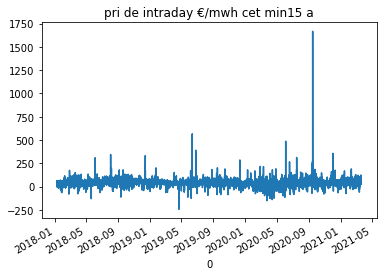

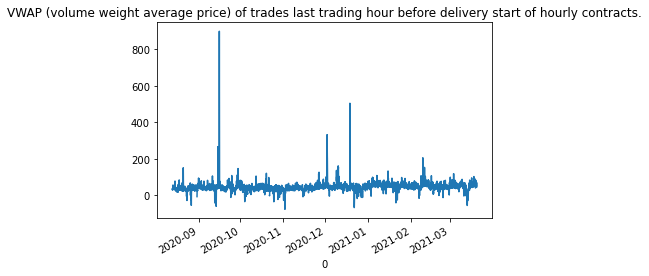

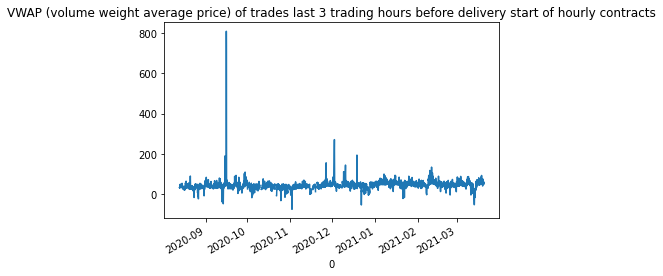

In [12]:
datasets = ['1103','143289','143325']
dataset_names = ['pri de intraday €/mwh cet min15 a', 'VWAP (volume weight average price) of trades last trading hour before delivery start of hourly contracts.', 'VWAP (volume weight average price) of trades last 3 trading hours before delivery start of hourly contracts']
for i in range(len(datasets)):
    printChart(datasets[i], dataset_names[i])

In [53]:
series = pd.read_csv('../dataset\Intraday/143289.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#subsetting of time series
len(series)

5268

In [64]:
#Implement simple running mean

series_rolling = series.rolling(window=3).mean()
series_rolling.head(20)

0
2020-08-12 23:00:00          NaN
2020-08-13 00:00:00          NaN
2020-08-13 01:00:00    33.476667
2020-08-13 02:00:00    32.096667
2020-08-13 03:00:00    29.350000
2020-08-13 04:00:00    28.930000
2020-08-13 05:00:00    33.333333
2020-08-13 06:00:00    39.580000
2020-08-13 07:00:00    43.320000
2020-08-13 08:00:00    48.126667
2020-08-13 09:00:00    47.953333
2020-08-13 10:00:00    49.366667
2020-08-13 11:00:00    46.980000
2020-08-13 12:00:00    48.660000
2020-08-13 13:00:00    49.606667
2020-08-13 14:00:00    47.343333
2020-08-13 15:00:00    44.636667
2020-08-13 16:00:00    43.456667
2020-08-13 17:00:00    43.166667
2020-08-13 18:00:00    43.813333
Name: 1, dtype: float64

In [75]:
len(series_rolling) == len(series)

True

In [98]:
##Intraday prices: Alert for large price changes

def large_price_change(series=None, threshold=3, window_day=1, running_mean=3, contract_type='hourly'):
    if contract_type == 'hourly':
        time = 24
    elif contract_type == 'quarterly':
        time = 24*60 / 15
    start = 0 #start index
    end = int(time*window_day) #end of index: depending on how many days we want to include
    
    #We create a new time series with a running mean to smooth the values
    series_running = series.rolling(window=3).mean()

    #empty list of that will be filled with alerts 0: no alert, 1: alert
    alert = []
    
    #We iterate through the time series with the start and end index
    while end < len(series):
        price_change = (series[end]-series_running[start]) / series_running[start]
        if price_change > threshold:
            alert.append(1)
        else: 
            alert.append(0)
        start += 1
        end += 1
    
    return alert

In [99]:
len(series)

5268

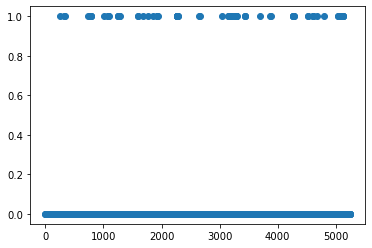

In [100]:
alerts = large_price_change(series)
plt.scatter(range(len(alerts)), alerts)